## Week 6-Pulsar dataset

### 1. Import libraries
### 2. Import dataset  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### 3. Explore the data to gain insights about the data 

In [2]:
df=pd.read_csv("pulsar_data.csv")
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
df.info()
import warnings
warnings.filterwarnings('ignore')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [4]:
df.shape

(12528, 9)

we have 8 continuous variables and 1 discrete variable `target_class`

In [5]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We see a lot of unneccesary spaces

- `.str.strip()`: This is a pandas Series method that operates on each element of the Series (in this case, each column label). It removes leading and trailing whitespace from each element.

In [6]:
df.columns=df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Shortening column names for convenience

In [7]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

 checking distribution of target_class column


In [8]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

viewing percentage distribution

In [9]:
df['target_class'].value_counts()/(len(df))*100

0.0    90.796616
1.0     9.203384
Name: target_class, dtype: float64

- It is an imbalanced distribution

Exploring missing values

In [10]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [12]:
for i in df.columns:
    df[i].fillna(df[i].median(),inplace=True)
    

In [13]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

- null values replaced with the median of the respective column

 view summary statistics in numerical variables


In [14]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00
mean,111.04,46.52,0.44,1.78,12.67,25.60,8.33,104.41,0.09
std,25.67,6.80,0.99,6.21,29.61,18.81,4.54,104.80,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.06,-0.19,1.91,14.76,5.80,38.13,0.00
50%,115.18,46.93,0.22,0.20,2.79,18.41,8.45,83.13,0.00
75%,127.11,50.98,0.42,0.93,5.41,26.47,10.73,135.77,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


Drawing boxplots to visualize outliers

Text(0, 0.5, 'DM-SNR Skewness')

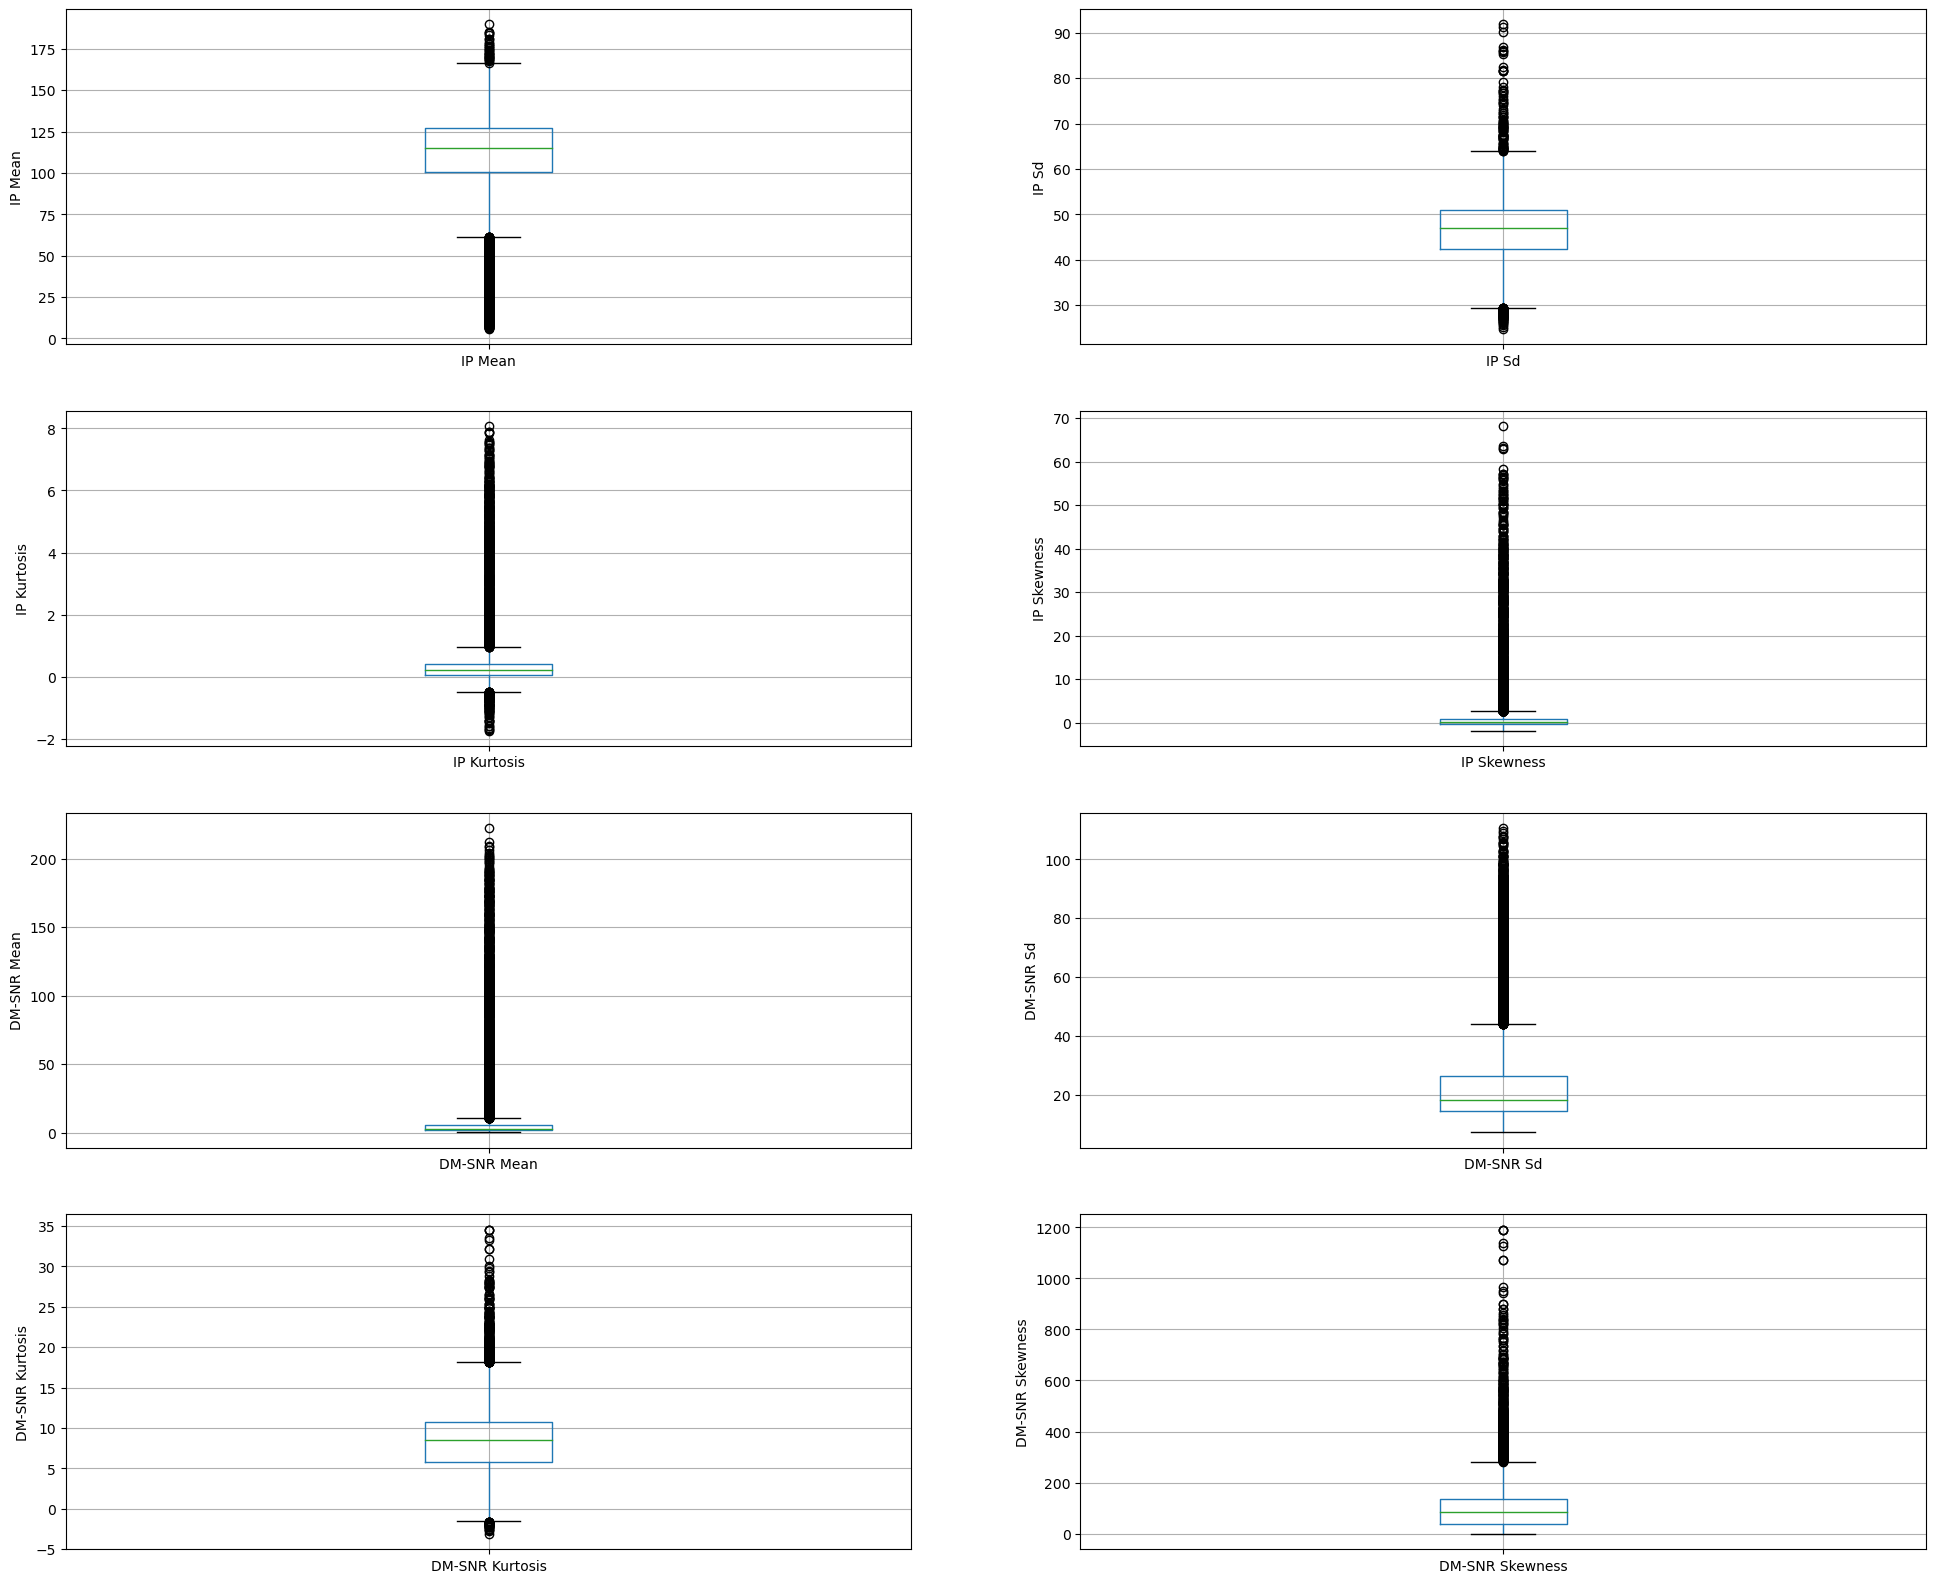

In [15]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

- We see that there are too mnay outliers in the dataset

There are 2 variants of SVMs. They are `hard-margin` variant of `SVM` and `soft-margin` variant of SVM.

The hard-margin variant of SVM **does not deal with outliers**. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.

Another version of SVM is called soft-margin variant of SVM. In this case, we can have a **few points incorrectly classified** or classified with a margin less than 1. But for every such point, we have to pay a **penalty** in the form of `C` parameter, which controls the outliers. _Low C implies we are allowing more outliers and high C implies less outliers._

The message is that since the dataset contains outliers, so the value of C should be high while training the model.

Checking distribution of variables

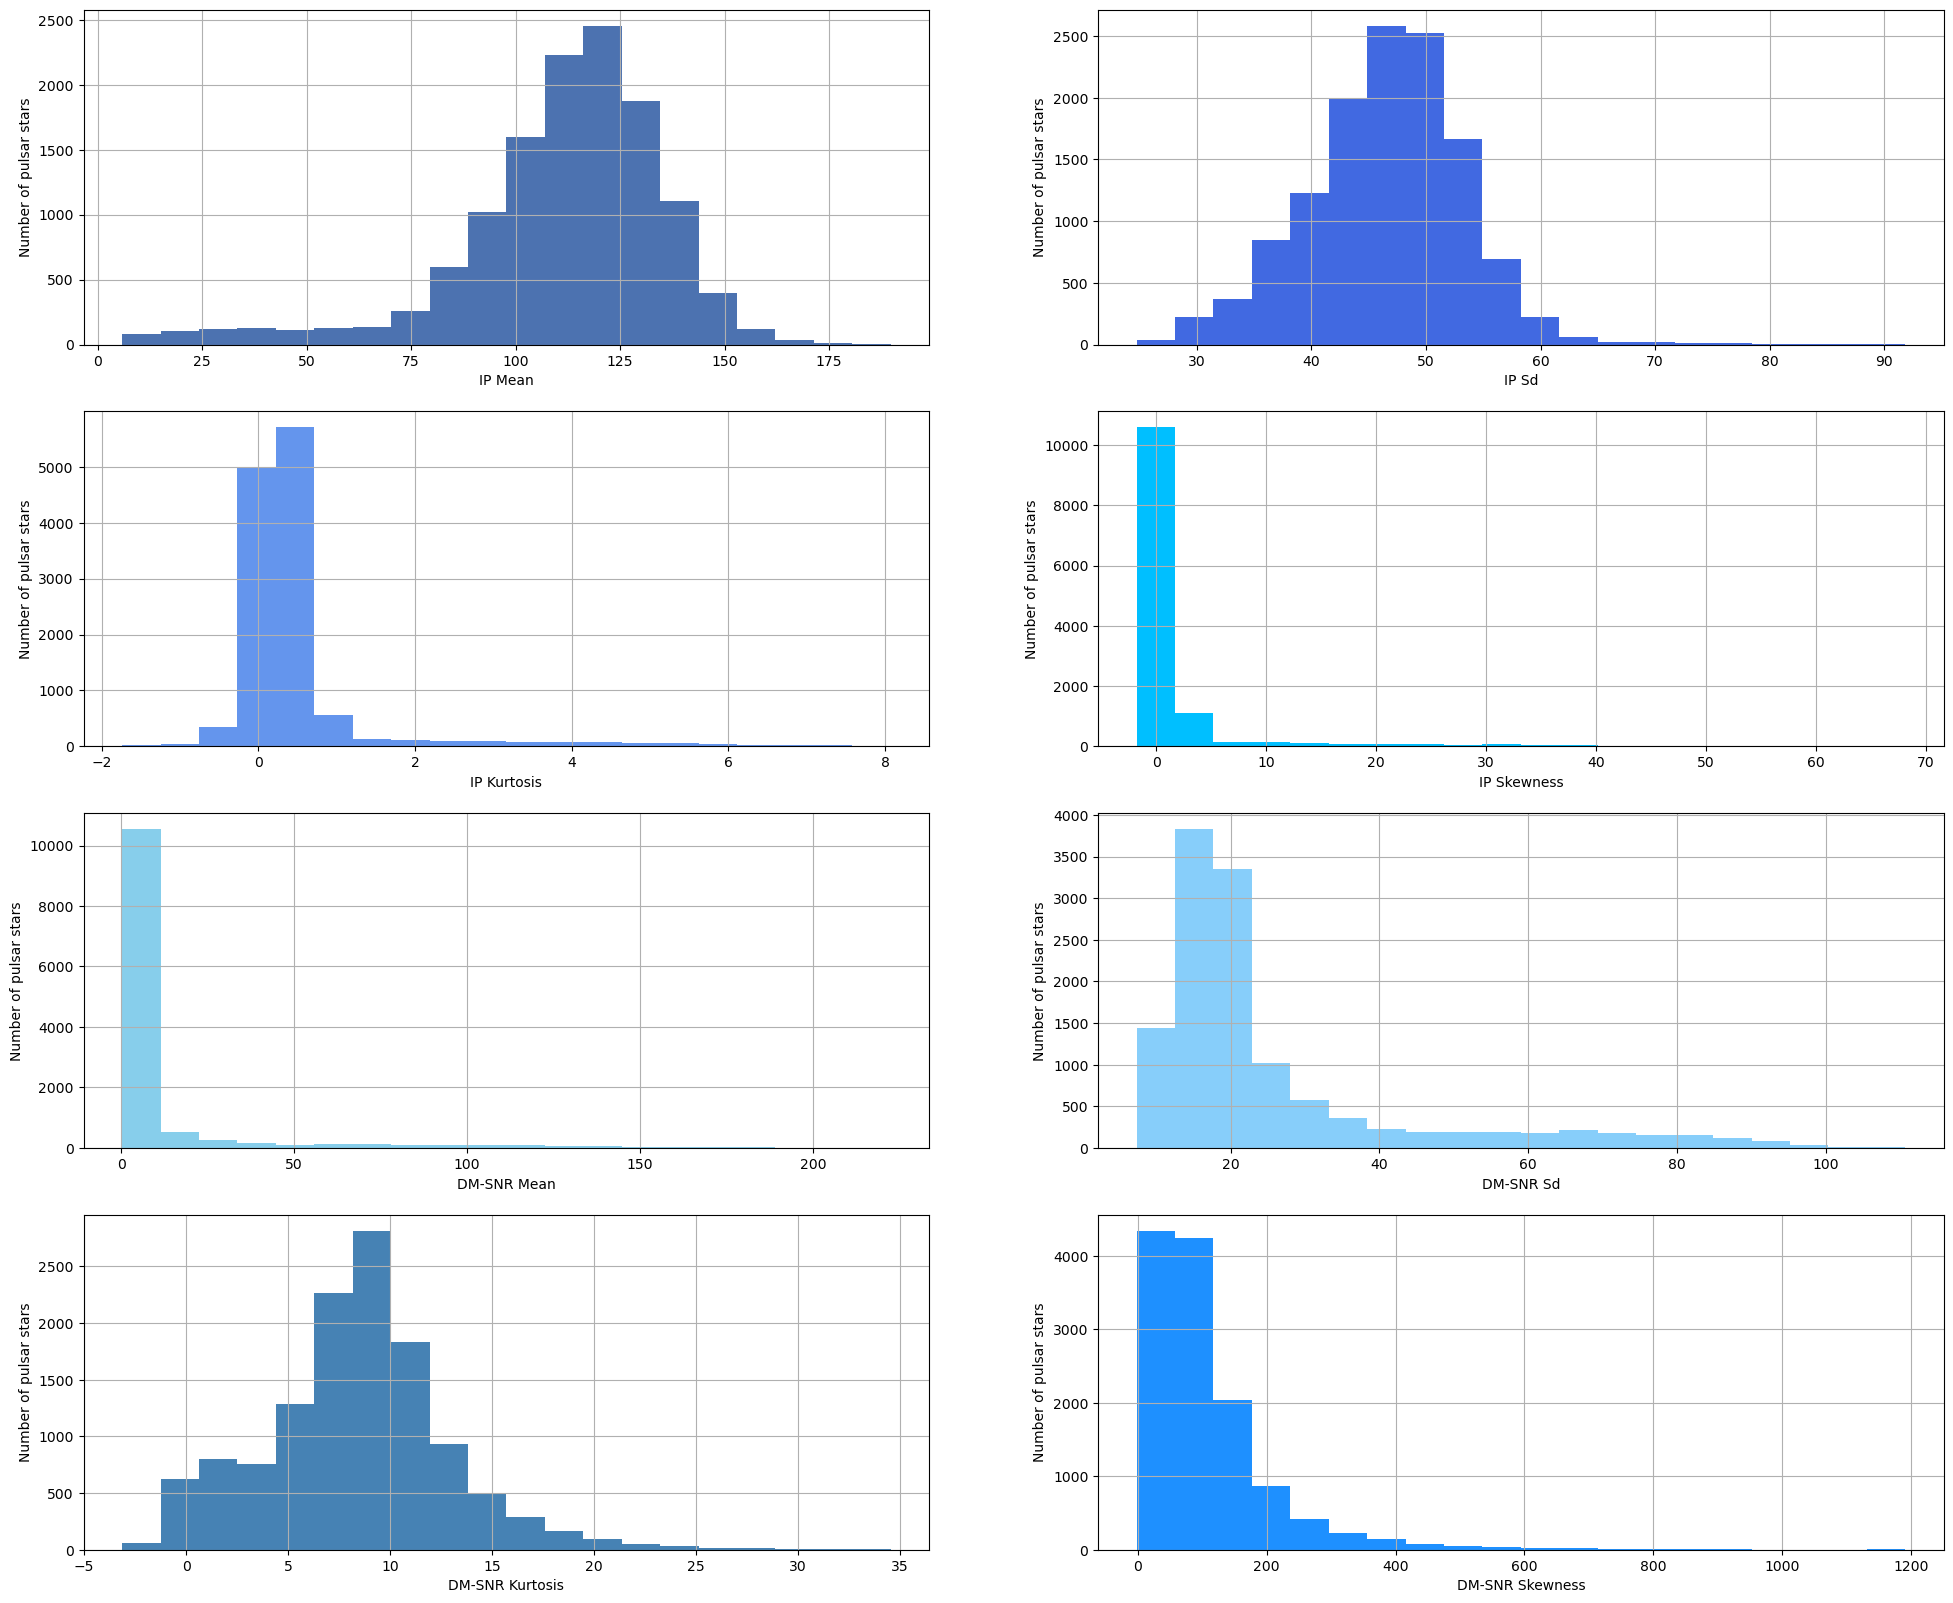

In [16]:
# The line plt.subplot(4, 2, 1) is used to create a subplot grid 
# with a total of 4 rows and 2 columns,
# and then select the subplot in the first position.

colors = ['#4c72b0', '#4169e1', '#6495ed', '#00bfff', 
          '#87ceeb', '#87cefa', '#4682b4', '#1e90ff']

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20, color=colors[0])
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20, color=colors[1])
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20, color=colors[2])
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20, color=colors[3])
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20, color=colors[4])
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20, color=colors[5])
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20, color=colors[6])
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20, color=colors[7])
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.show()

- We observe that all 8 variables are skewed

Declaring feature vector and target variable

In [18]:
X=df.drop(['target_class'],axis=1)
y=df['target_class']

### 5. Split data into separate training and test set 


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### 6. Feature Scaling

In [20]:
cols=X_train.columns

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])

We have X_train dataset ready to be fed

### 7. Run SVM with default hyperparameters 

Default hyperparameter:<br>
<br>
- C=1.0<br>
- kernel=rbf(Radial Basis Function Kernel)<br>
- gamma=auto<br><br>
 `Radial Basis Function Kernel`:
_is a general purpose kernel. It is used when we have no prior knowledge about the data._


In [24]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9792


##### Run SVM with rbf kernel and C=1.0 and gamma=auto

- Note: Lower C means higher number rof outliers

In [25]:
svc=SVC(C=1.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9792


##### Run SVM with rbf kernel and C=100.0 and gamma=auto

In [26]:
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100: 0.9796


- We obtained higher accuracy for a higher C value. Which implies lesser outliers

##### Run SVM with rbf kernel and C=1000.0 and gamma=auto

In [27]:
svc=SVC(C=1000.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000: 0.9804


- on further increasing C value, we see that accuracy is reduced

### 8. Run SVM with linear kernel

##### Run SVM with linear kernel and C=1.0

In [28]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9773


##### Run SVM with linear kernel and C=100.0

In [29]:
# instantiate classifier with linear kernel and C=100.0
linear_svc=SVC(kernel='linear', C=100.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=100.0 : 0.9777


##### Run SVM with linear kernel and C=1000.0

In [30]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc=SVC(kernel='linear', C=1000.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1000.0 : 0.9777


- In this case we obtained higher accuracy for C=100 and C=1000

##### Comparing train set and test set accuracy

In [31]:
#Checking accuracy of the train-set
y_pred_train = linear_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9756


In [32]:
#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))


Training set score: 0.9756
Test set score: 0.9777


We can see that the training set and test-set accuracy are very much comparable.
So, no overfitting

### 9. Run SVM with polynomial kernel

##### Run SVM with polynomial kernel and C=1.0

In [31]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9761


##### Run SVM with polynomial kernel and C=100.0

In [32]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9796


##### Run SVM with polynomial kernel and C=1000.0

In [33]:
# instantiate classifier with polynomial kernel and C=1000.0
poly_svc=SVC(kernel='poly', C=1000.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1000.0 : 0.9789


### 10. Run SVM with sigmoid kernel 


##### Run SVM with sigmoid kernel and C=1.0, C=100.0, C=1000.0

In [34]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8679


In [35]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc=SVC(kernel='sigmoid', C=100.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8675


In [36]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1000.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1000.0 : 0.8675


- We see that sigmoid kernel gives a very poor performance

### We got maximum accuracy for SVM with `rbf kernel` and `C=100.0` and gamma=auto.
### Accuracy score obtained was `0.9812`

### 13. visualize confusion matrix with seaborn heatmap


In [33]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2277    8]
 [  48  173]]

True Positives(TP) =  2277

True Negatives(TN) =  173

False Positives(FP) =  8

False Negatives(FN) =  48


<Axes: >

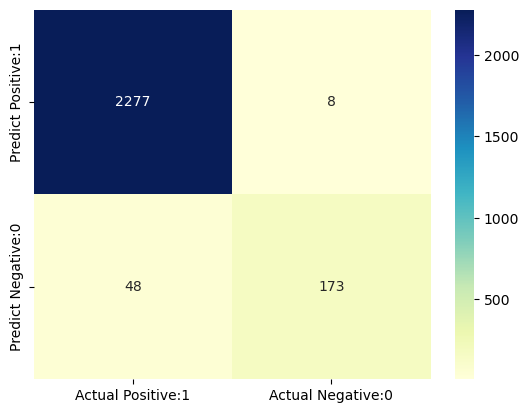

In [34]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 14. Generate classification report 


Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.96      0.78      0.86       221

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.92      2506
weighted avg       0.98      0.98      0.98      2506



### 15. Evaluate classification accuracy


In [36]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [37]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9777


### 16. Evaluate Classification error


In [38]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0223


### 17. Plot ROC Curve


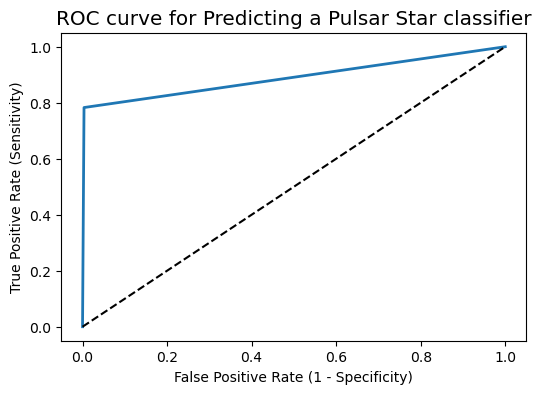

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### 18. Compute ROC AUC


In [40]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8897


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

In [41]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9651


### 19. Stratified k-fold cross-validation with shuffle split with linear kernel


k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because we have a imbalnced dataset. So, in the case of imbalanced dataset, we will use another technique to evaluate model performance. It is called stratified k-fold cross-validation.

In stratified k-fold cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

Moreover, I will shuffle the data before splitting because shuffling yields much better result.

In [ ]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [ ]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

In [ ]:
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

### 21. Stratified k-fold cross-validation with shuffle split with rbf kernel


In [ ]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [ ]:
# print cross-validation scores with rbf kernel
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

In [ ]:
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

### 22. Stratified k-fold cross-validation with shuffle split with polynomial kernel


In [ ]:
# Create the SVM model with polynomial kernel
poly_svc = SVC(kernel='poly')

# Create Stratified k-fold cross-validator with shuffle split
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Perform cross-validation
poly_scores = cross_val_score(poly_svc, X, y, cv=stratified_kfold)

# Print cross-validation scores with polynomial kernel
print('Stratified Cross-validation scores with polynomial kernel:\n\n{}'.format(poly_scores))

# Print average stratified cross-validation score with polynomial kernel
print('Average stratified cross-validation score with polynomial kernel: {:.4f}'.format(poly_scores.mean()))


### 23. Stratified k-fold cross-validation with shuffle split with sigmoid kernel


In [ ]:
# Create the SVM model with sigmoid kernel
sigmoid_svc = SVC(kernel='sigmoid')

# Create Stratified k-fold cross-validator with shuffle split
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Perform cross-validation
sigmoid_scores = cross_val_score(sigmoid_svc, X, y, cv=stratified_kfold)

# Print cross-validation scores with sigmoid kernel
print('Stratified Cross-validation scores with sigmoid kernel:\n\n{}'.format(sigmoid_scores))

# Print average stratified cross-validation score with sigmoid kernel
print('Average stratified cross-validation score with sigmoid kernel: {:.4f}'.format(sigmoid_scores.mean()))
